Load necessary libraries.

In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)
set.seed(5)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

Download data from web.

In [2]:
url <- "https://raw.githubusercontent.com/dvolman/DSCI-Group-Project/main/Raisin_Dataset.csv"
raisin_data <- read_csv(url)
raisin_data

Rows: 900 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Class
dbl (7): Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, E...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
99657,431.7070,298.8373,0.7216841,106264,0.7410985,1292.828,Besni
93523,476.3441,254.1761,0.8457385,97653,0.6587983,1258.548,Besni
85609,512.0818,215.2720,0.9073454,89197,0.6320200,1272.862,Besni


Convert `Class` to factor and rename columns for readability.

In [3]:
raisin_data <- raisin_data |>
                mutate(Class = as_factor(Class))
colnames(raisin_data) <- c("Area", "Major_Axis_Length", "Minor_Axis_Length", "Eccentricity", "Convex_Area", "Extent", "Perimeter", "Class")
raisin_data

Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
90856,442.2670,266.3283,0.7983536,93717,0.6376128,1208.575,Kecimen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
99657,431.7070,298.8373,0.7216841,106264,0.7410985,1292.828,Besni
93523,476.3441,254.1761,0.8457385,97653,0.6587983,1258.548,Besni
85609,512.0818,215.2720,0.9073454,89197,0.6320200,1272.862,Besni


Separate into training and testing sets.

In [4]:
set.seed(5)

raisin_split <- initial_split(raisin_data, prop = 0.75, strata = Class)
raisin_train <- training(raisin_split)
raisin_test <- testing(raisin_split)
raisin_train
raisin_test

Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
137583,649.5415,273.2603,0.9072011,142650,0.7316377,1590.354,Besni
117592,533.2929,288.5583,0.8409660,123587,0.7300677,1432.006,Besni
95546,487.1783,251.9602,0.8558749,99166,0.7227820,1276.807,Besni
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
67874,360.0235,243.2720,0.7371662,69889,0.6783194,1035.277,Kecimen
50312,354.2356,182.3121,0.8573923,52070,0.6233522,961.439,Kecimen
41995,259.2089,210.3508,0.5843375,43443,0.7297006,801.526,Kecimen


Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Perimeter,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
94282,494.1630,244.8039,0.8686701,97707,0.7023862,1269.680,Besni
68799,356.5678,253.2547,0.7039427,71879,0.7009292,1041.270,Besni
93523,476.3441,254.1761,0.8457385,97653,0.6587983,1258.548,Besni


Cross validation.

In [17]:
raisin_vfold <- vfold_cv(raisin_train, v = 10, strata = Class)

Recipe with training set.

In [6]:
raisin_recipe <- recipe(Class ~ Area + Major_Axis_Length + Convex_Area + Perimeter, data = raisin_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

Model specification with k-nearest neighbors tuned.

In [7]:
knn_spec <- nearest_neighbor(weight_func = "rectangular",
                            neighbors = tune()) |>
                            set_engine("kknn") |>
                            set_mode("classification")

Fit into workflow.

In [8]:
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

knn_workflow <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = raisin_vfold, grid = k_vals) |>
  collect_metrics()

accuracy <- knn_workflow |>
  filter(.metric == "accuracy")

accuracy

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8042335,10,0.01606972,Preprocessor1_Model01
6,accuracy,binary,0.8605615,10,0.01806892,Preprocessor1_Model02
11,accuracy,binary,0.8695187,10,0.01685016,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
86,accuracy,binary,0.8636809,10,0.01859279,Preprocessor1_Model18
91,accuracy,binary,0.8637255,10,0.01791074,Preprocessor1_Model19
96,accuracy,binary,0.8607398,10,0.01769202,Preprocessor1_Model20


Plotting accuracy to find best k value.

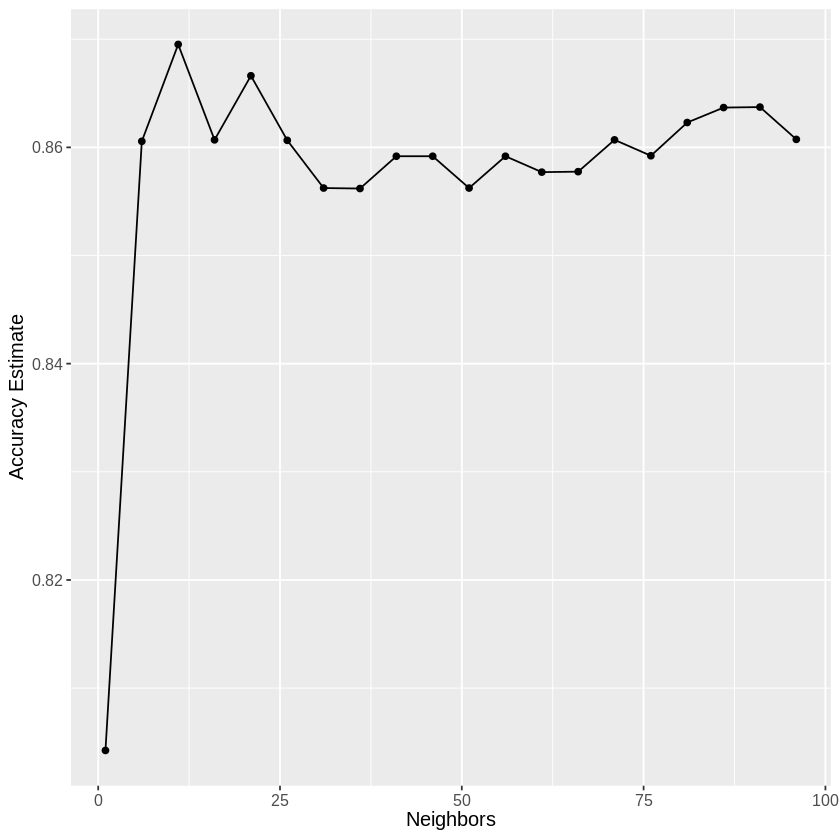

In [9]:
accuracy_vs_k <- ggplot(accuracy, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") +
  theme(text = element_text(size = 12))

accuracy_vs_k

Find where mean is highest to definitively find best k. 

In [10]:
best_k <- accuracy |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 11

Fitting using new best k.

In [11]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(raisin_recipe) |>
  add_model(knn_spec) |>
  fit(data = raisin_train)

knn_fit


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(11,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1275964
Best kernel: rectangular
Best k: 11

Predict and obtain accuracy.

In [16]:
raisin_predictions <- predict(knn_fit, raisin_test) |>
  bind_cols(raisin_test)
raisin_predictions
raisin_predictions |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.pred_class,Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Perimeter,Class
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Besni,87524,442.2460,253.2912,0.8197384,90546,0.7586506,1184.040,Kecimen
Kecimen,75166,406.6907,243.0324,0.8018052,78789,0.6841296,1121.786,Kecimen
Kecimen,79408,352.1908,290.8275,0.5640113,81463,0.7927719,1073.251,Kecimen
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Besni,94282,494.1630,244.8039,0.8686701,97707,0.7023862,1269.680,Besni
Kecimen,68799,356.5678,253.2547,0.7039427,71879,0.7009292,1041.270,Besni
Besni,93523,476.3441,254.1761,0.8457385,97653,0.6587983,1258.548,Besni


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8274336


Estimated precision.

In [13]:
raisin_predictions |>
    precision(truth = Class, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.7761194


Estimated recall.

In [14]:
raisin_predictions |>
    recall(truth = Class, estimate = .pred_class, event_level="first")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.920354


Confusion matrix.

In [15]:
confusion_matrix <- raisin_predictions |>
             conf_mat(truth = Class, estimate = .pred_class)
confusion_matrix

          Truth
Prediction Kecimen Besni
   Kecimen     104    30
   Besni         9    83